# Modeles KNN et Decision tree

## Plan
- Chargement des packages utilisés
- 1- Base de données
  - Lecture de la base de données
  - Creation de la colonne Mortality_cat,taux de mortalité réparti en 18 classes
  - Création des data set train et test
- 2- Modèles
  - KNN regressor
  - Decision tree regressor
  - KNN classifier
  - Decision tree classifier
- Conclusion
  
    

### Chargement des packages utilisés

In [1]:
import pandas as pd
import numpy as np
import math
import graphviz  
import pydotplus
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm 
from sklearn.feature_selection import  f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier , export_graphviz
from sklearn import tree
%matplotlib inline
plt.style.use('ggplot')

## 1- Base de données

### Lecture de la base de données

In [2]:
df= pd.read_csv('data_mort_wb_sub.csv',delimiter=',',low_memory=False)
df.describe()

,Sex,Age_bucket,Year,Mortality_rate,SP.URB.TOTL.IN.ZS,SP.URB.GROW,SP.POP.GROW,SE.PRM.DURS,AG.SRF.TOTL.K2,SE.PRE.DURS,...,EN.ATM.CO2E.LF.KT,EN.ATM.METH.AG.KT.CE,EN.ATM.METH.EG.KT.CE,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.EG.KT.CE,NY.GDP.TOTL.RT.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD
count,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,4.052800e+04,40528.000000,...,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,40528.000000,4.052800e+04,40528.000000,4.052800e+04,40528.000000
mean,1.499803,8.500000,2006.873668,51.030043,67.273306,1.241861,0.919895,5.558626,7.315059e+05,2.816028,...,53002.722950,13398.613910,11296.042577,8235.300450,984.426349,5.009276,1.312268e+05,7.261424,3.395775e+11,18434.052781
std,0.500006,4.609829,4.293456,132.479155,18.628201,1.767979,1.578396,1.013258,2.264324e+06,0.828888,...,95781.142948,35030.810150,38135.292791,18487.500665,1694.389589,9.824583,2.449466e+05,7.402211,7.703459e+11,20146.434508
min,1.000000,1.000000,2000.000000,0.000000,9.092000,-2.697859,-2.850973,3.000000,1.800000e+02,1.000000,...,-4781.768000,0.000000,0.000000,0.000000,0.000000,0.000000,2.566900e+01,0.180554,6.310127e+07,139.109143
25%,1.000000,4.750000,2003.000000,0.000000,54.154000,0.247632,0.167276,5.000000,2.297000e+04,2.000000,...,4517.744000,643.580946,420.663813,354.668402,64.430096,0.164840,7.425675e+03,2.415110,1.378973e+10,3921.720395
50%,1.000000,8.500000,2007.000000,1.368424,67.856000,1.035807,0.735049,6.000000,9.303000e+04,3.000000,...,17891.293000,3395.375955,1709.995362,2435.877824,217.271746,1.099987,4.295524e+04,5.463501,5.712367e+10,10153.938218
75%,2.000000,12.250000,2010.000000,32.947897,81.293000,1.926368,1.437374,6.000000,3.779620e+05,3.000000,...,44924.417000,11759.851890,11002.841648,8063.684071,817.587738,4.346656,1.128776e+05,9.103872,2.613748e+11,27169.992558
max,2.000000,16.000000,2015.000000,1428.571429,100.000000,17.899614,17.624770,8.000000,1.709825e+07,4.000000,...,661332.449000,315949.829234,406730.780472,157461.517800,8035.202214,80.920595,1.768073e+06,67.452198,6.203213e+12,117507.808593


In [20]:
#Conversion de colonnes contry, sex et age_bucket en objet
df["Country"] = df["Country"].astype('category')
df["Country_code"] = df["Country"].cat.codes
df["Country_code"] = df["Country_code"].astype('object')
df["Sex"] = df["Sex"].astype('object')
df["Age_bucket"] = df["Age_bucket"].astype('object')
df.dtypes

Sex                       object
Age_bucket                object
Year                       int64
Country                 category
Mortality_rate           float64
SP.URB.TOTL.IN.ZS        float64
SP.URB.GROW              float64
SP.POP.GROW              float64
SE.PRM.DURS              float64
AG.SRF.TOTL.K2           float64
SE.PRE.DURS              float64
EN.POP.DNST              float64
SE.SEC.DURS              float64
SP.DYN.CBRT.IN           float64
SP.DYN.CDRT.IN           float64
NY.ADJ.AEDU.GN.ZS        float64
SP.DYN.TFRT.IN           float64
SP.ADO.TFRT              float64
SP.DYN.LE00.FE.IN        float64
SP.DYN.LE00.IN           float64
SP.POP.DPND              float64
SP.DYN.AMRT.FE           float64
SP.DYN.AMRT.MA           float64
EN.ATM.NOXE.KT.CE        float64
EN.ATM.METH.KT.CE        float64
AG.LND.AGRI.K2           float64
EN.ATM.GHGO.KT.CE        float64
AG.LND.AGRI.ZS           float64
AG.PRD.FOOD.XD           float64
IT.CEL.SETS              float64
AG.PRD.LVS

### Création de la colonne Mortality_cat,taux de mortalité réparti en 18 classes

In [21]:
#Regression ==> Classification
df1=df.copy()
df1.sort_values(by=['Mortality_rate'], ascending=False)
df1['Mortality_rate'].quantile([0,.1,.2,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1])
df1[df1['Mortality_rate']==0].count() # il y a 13051 lignes avec des zéros sur 37264 au total => il y a 35.0230786% avec des zéros
# on crée 18 tranches
df1['Mortality_cat'] = pd.qcut(df1['Mortality_rate'] , q = [0,0.350230786,0.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.96,.97,.98,.99,1], 
    labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]) 

### Création des data set train et test

In [79]:
scaler = MinMaxScaler()
Y1=df['Mortality_rate']
X1=scaler.fit_transform(df[['Sex','Age_bucket','Year','Country_code','SP.URB.TOTL.IN.ZS',	'SP.URB.GROW',	'SP.POP.GROW',	'SE.PRM.DURS',	'AG.SRF.TOTL.K2',	'SE.PRE.DURS',	'EN.POP.DNST',	'SE.SEC.DURS',	'SP.DYN.CBRT.IN',	'SP.DYN.CDRT.IN',	'NY.ADJ.AEDU.GN.ZS',	'SP.DYN.TFRT.IN',	'SP.ADO.TFRT',	'SP.DYN.LE00.FE.IN',	'SP.DYN.LE00.IN',	'SP.POP.DPND',	'SP.DYN.AMRT.FE',	'SP.DYN.AMRT.MA',	'EN.ATM.NOXE.KT.CE',	'EN.ATM.METH.KT.CE',	'AG.LND.AGRI.K2',	'EN.ATM.GHGO.KT.CE',	'AG.LND.AGRI.ZS',	'AG.PRD.FOOD.XD',	'IT.CEL.SETS',	'AG.PRD.LVSK.XD',	'AG.PRD.CROP.XD',	'IT.MLT.MAIN',	'EN.ATM.GHGT.KT.CE',	'EN.ATM.CO2E.GF.ZS',	'EN.ATM.CO2E.LF.ZS',	'EN.ATM.CO2E.SF.ZS',	'NY.GDP.FRST.RT.ZS',	'NY.GDP.MINR.RT.ZS',	'EN.ATM.CO2E.LF.KT',	'EN.ATM.METH.AG.KT.CE',	'EN.ATM.METH.EG.KT.CE',	'EN.ATM.NOXE.AG.KT.CE',	'EN.ATM.NOXE.EG.KT.CE',	'NY.GDP.TOTL.RT.ZS',	'EN.ATM.CO2E.KT',	'EN.ATM.CO2E.PC',	'NY.GDP.MKTP.CD',	'NY.GDP.PCAP.CD']])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1,shuffle=True,random_state=10,test_size=0.30)

In [76]:
Y=df1['Mortality_cat']
X=df1[['Sex','Age_bucket','Year','Country_code','SP.URB.TOTL.IN.ZS',	'SP.URB.GROW',	'SP.POP.GROW',	'SE.PRM.DURS',	'AG.SRF.TOTL.K2',	'SE.PRE.DURS',	'EN.POP.DNST',	'SE.SEC.DURS',	'SP.DYN.CBRT.IN',	'SP.DYN.CDRT.IN',	'NY.ADJ.AEDU.GN.ZS',	'SP.DYN.TFRT.IN',	'SP.ADO.TFRT',	'SP.DYN.LE00.FE.IN',	'SP.DYN.LE00.IN',	'SP.POP.DPND',	'SP.DYN.AMRT.FE',	'SP.DYN.AMRT.MA',	'EN.ATM.NOXE.KT.CE',	'EN.ATM.METH.KT.CE',	'AG.LND.AGRI.K2',	'EN.ATM.GHGO.KT.CE',	'AG.LND.AGRI.ZS',	'AG.PRD.FOOD.XD',	'IT.CEL.SETS',	'AG.PRD.LVSK.XD',	'AG.PRD.CROP.XD',	'IT.MLT.MAIN',	'EN.ATM.GHGT.KT.CE',	'EN.ATM.CO2E.GF.ZS',	'EN.ATM.CO2E.LF.ZS',	'EN.ATM.CO2E.SF.ZS',	'NY.GDP.FRST.RT.ZS',	'NY.GDP.MINR.RT.ZS',	'EN.ATM.CO2E.LF.KT',	'EN.ATM.METH.AG.KT.CE',	'EN.ATM.METH.EG.KT.CE',	'EN.ATM.NOXE.AG.KT.CE',	'EN.ATM.NOXE.EG.KT.CE',	'NY.GDP.TOTL.RT.ZS',	'EN.ATM.CO2E.KT',	'EN.ATM.CO2E.PC',	'NY.GDP.MKTP.CD',	'NY.GDP.PCAP.CD']]
X_train, X_test, y_train, y_test = train_test_split(X, Y,shuffle=True,random_state=10,test_size=0.30)



## Modèles

### KNN Regressor

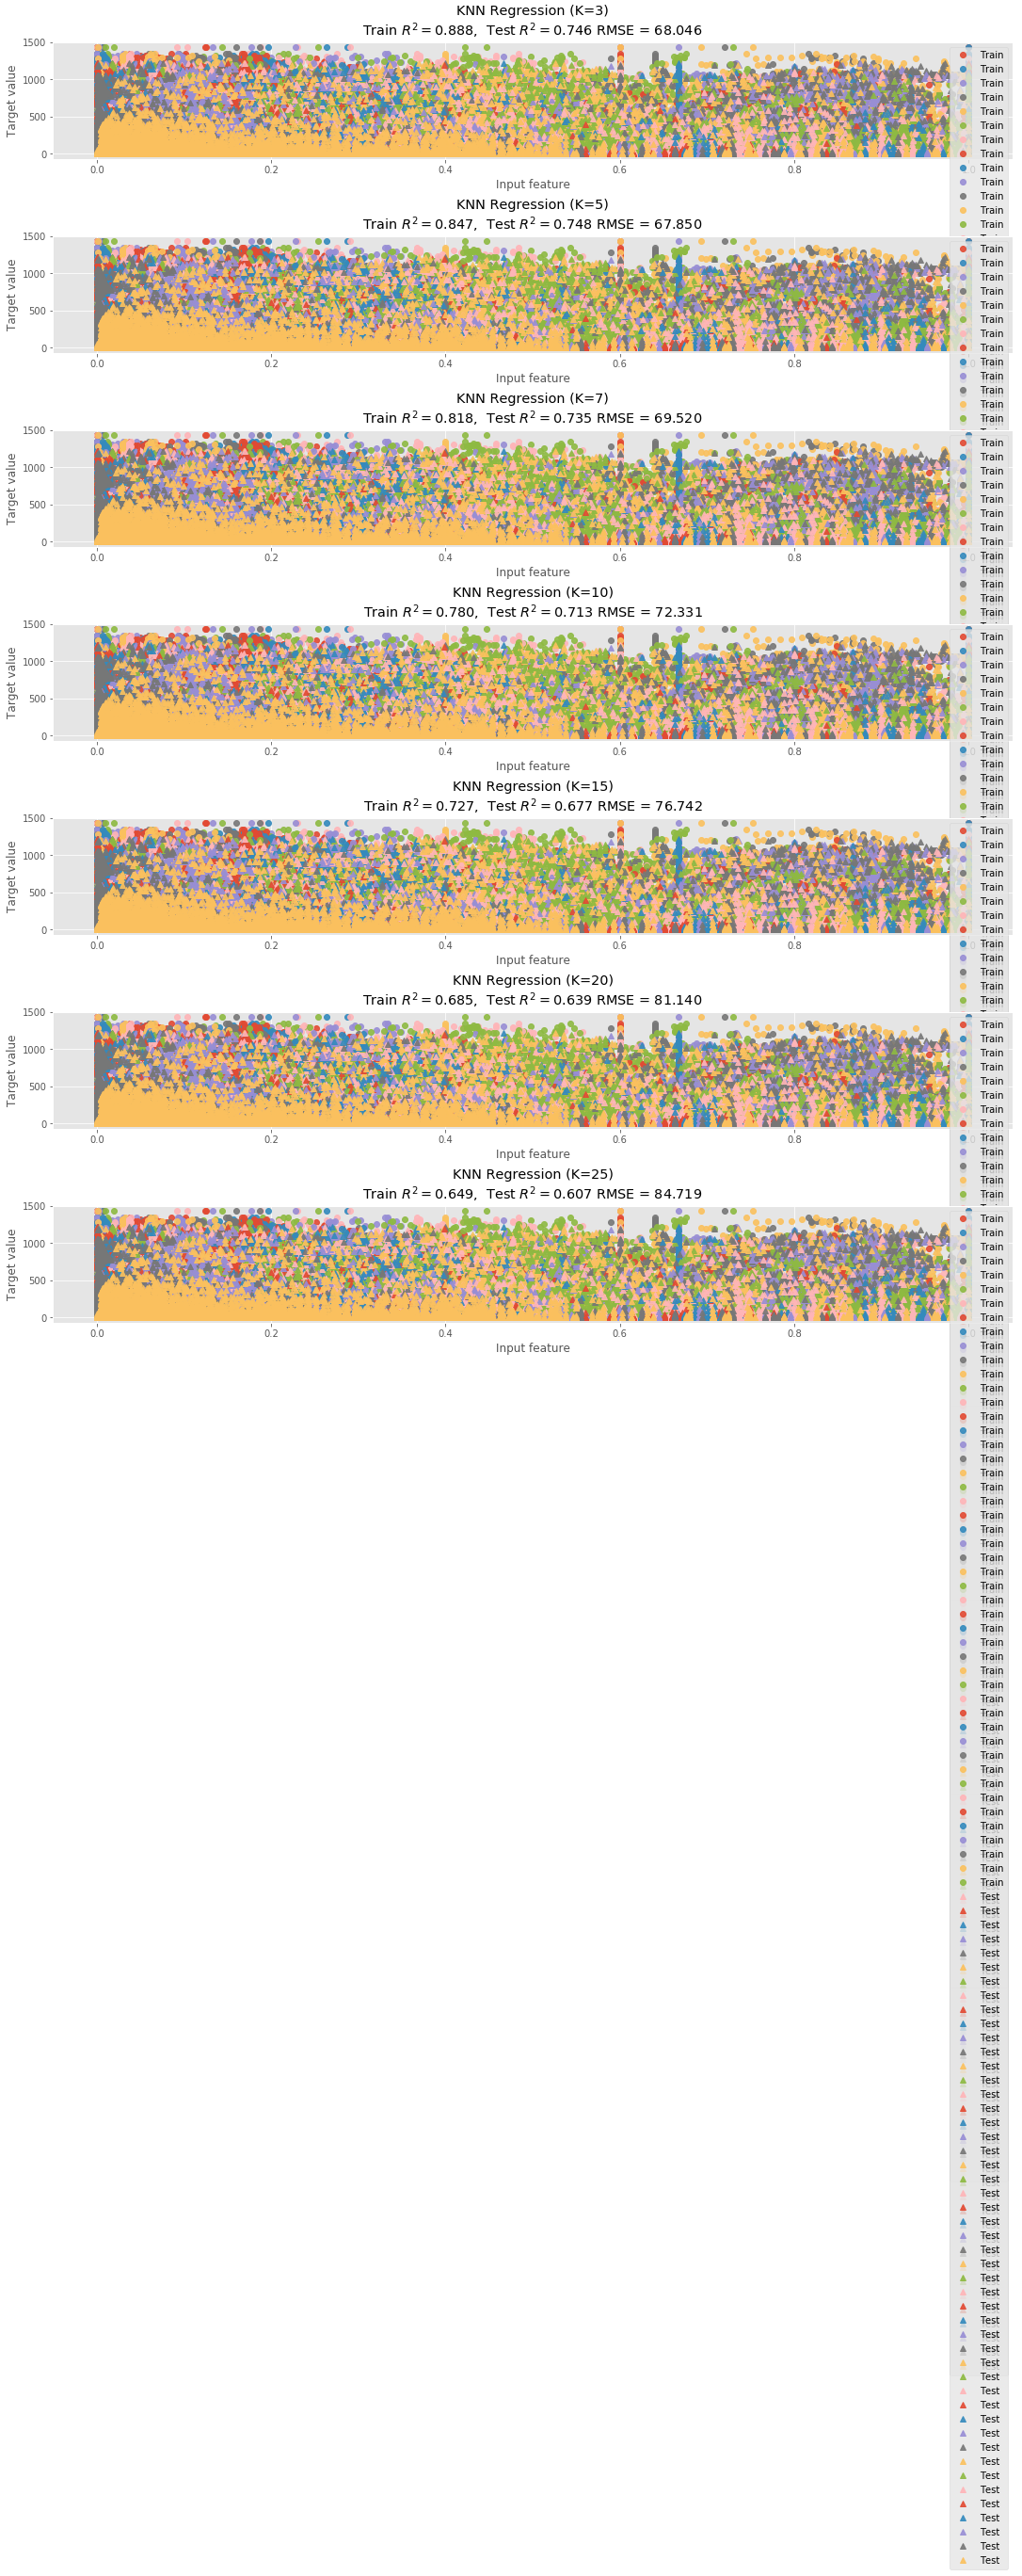

In [113]:
fig, subaxes = plt.subplots(7, 1, figsize=(15,20))
for thisaxis, K in zip(subaxes, [3,5, 7, 10, 15,20,25]):
    knnreg = KNeighborsRegressor(n_neighbors = K,n_jobs=-1).fit(X1_train, y1_train)
    predictions = knnreg.predict(X1_test)
    train_score = knnreg.score(X1_train, y1_train)
    test_score = knnreg.score(X1_test, y1_test)
    rmse=math.sqrt(mean_squared_error(y1_test, predictions))
    thisaxis.plot(X1_train, y1_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X1_test, y1_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$ RMSE = {:.3f}'
                      .format(K, train_score, test_score,rmse))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

Nous allons donc choisir KNN = 10;

In [99]:
# Creation du modèle KNN
knn = KNeighborsRegressor(n_neighbors=15,n_jobs=-1)
# Fit du model sur le train
regr_knn_fit=knn.fit(X1_train, y1_train)
# Predictions
predictions = knn.predict(X1_test)
# Calcul du RMSE
rmse1=math.sqrt(mean_squared_error(y1_test, predictions))
# Calcul du R2 du train
score_train1=regr_knn_fit.score(X1_train, y1_train)
# Calcul du R2 du test
score_test1=regr_knn_fit.score(X1_test, y1_test)
print('Root mean squared error of KNN regressor : {:.2f}'
     .format(rmse1))
print('R2 of KNN regressor on training set: {:.2f}'
     .format(score_train1))
print('R2 of KNN regressor on test set: {:.2f}'
     .format(score_test1))

Root mean squared error of KNN regressor : 72.33
R2 of KNN regressor on training set: 0.78
R2 of KNN regressor on test set: 0.71


In [100]:
print("Minimum :", predictions.min())
print("Maximum :", predictions.max())
print("Moyenne :", predictions.mean())
print("Médiane :", np.median(predictions))
print("Ecart-type :", predictions.std())

Minimum : 0.0
Maximum : 687.411138356
Moyenne : 45.5837581025
Médiane : 4.478137494
Ecart-type : 93.4859793939


Les resultats n'etant pas du tout satisfaisants,en plus de prendre des modèles plus performants, nous avons decidé de transformer la prediction en classification. Au lieu de prédire le taux de mortalité, nous allons prédire une classe de mortalité.

### KNN Classifier

In [29]:
# Creation du modèle KNN
knn = KNeighborsClassifier(n_neighbors=11)
# Fit du model sur le train
knn_fit=knn.fit(X_train, y_train)
# Predictions
predictions = knn.predict(X_test)
# Calcul du RMSE
rmse3=math.sqrt(mean_squared_error(y_test, predictions))
# Calcul de la précision du train
score_train3=knn_fit.score(X_train, y_train)
# Calcul de la précision du test
score_test3=knn_fit.score(X_test, y_test)
print('Root mean squared error of Decision Tree classifier : {:.2f}'
     .format(rmse3))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(score_train3))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(score_test3))

Root mean squared error of Decision Tree classifier : 3.86
Accuracy of Decision Tree classifier on training set: 0.46
Accuracy of Decision Tree classifier on test set: 0.37


### Decision tree Regressor

In [106]:
#Fonction pour afficher l'importance des features des arbres de décision
def plot_feature_importances(clf, feature_names): 
     c_features = len(feature_names) 
     plt.barh(range(c_features), clf.feature_importances_) 
     plt.xlabel("Feature importance") 
     plt.ylabel("Feature name")
     plt.yticks(np.arange(c_features), feature_names) 

 #### Avec tous les prédicteurs

In [110]:
# Creation du model decision tree
regr_tree = DecisionTreeRegressor(max_depth=10)
# Fit du model sur le train
reg_fit=regr_tree.fit(X1_train, y1_train)
# Predictions
pred = regr_tree.predict(X1_test)
# Calcul du RMSE
rmse2=math.sqrt(mean_squared_error(y1_test, pred))
# Calcul du R2 du train
score_train2=reg_fit.score(X1_train, y1_train)
# Calcul du R2 du test
score_test2=reg_fit.score(X1_test, y1_test)
print('Root mean squared error of Decision Tree Regressor : {:.2f}'
     .format(rmse2))
print('R2 of Decision Tree Regressor on training set: {:.2f}'
     .format(score_train2))
print('R2 of Decision Tree Regressor on test set: {:.2f}'
     .format(score_test2))

Root mean squared error of Decision Tree Regressor : 34.79
R2 of Decision Tree Regressor on training set: 0.98
R2 of Decision Tree Regressor on test set: 0.93


In [102]:
print("Minimum :", pred.min())
print("Maximum :", pred.max())
print("Moyenne :", pred.mean())
print("Médiane :", np.median(predictions))
print("Ecart-type :", predictions.std())

Minimum : 0.0
Maximum : 1224.59709316
Moyenne : 51.6194749105
Médiane : 4.478137494
Ecart-type : 93.4859793939


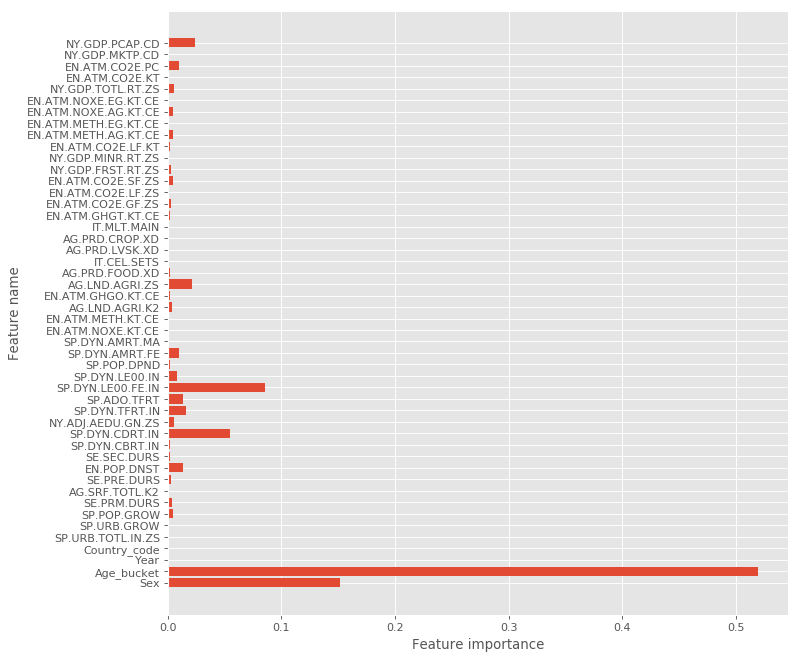

Feature importances: [  1.51880446e-01   5.19719912e-01   5.97315666e-04   9.18260753e-04
   6.92948656e-04   1.18858906e-03   4.37832833e-03   3.28666096e-03
   1.09448160e-03   2.73463282e-03   1.33147868e-02   2.13467554e-03
   2.31571038e-03   5.43893255e-02   5.72505069e-03   1.60149158e-02
   1.31181966e-02   8.57595616e-02   7.70529630e-03   1.68661284e-03
   9.62698772e-03   9.04536090e-04   4.51825720e-04   7.46804577e-04
   3.81527599e-03   1.52986410e-03   2.14102832e-02   1.95029398e-03
   1.19877610e-03   5.07867323e-04   1.65857977e-04   1.37482521e-03
   2.06820586e-03   2.76560806e-03   1.10877653e-03   4.71141735e-03
   2.88230408e-03   4.13782722e-04   2.01840165e-03   4.90622174e-03
   7.87357333e-04   4.55106339e-03   1.29177619e-03   5.65094330e-03
   3.27644983e-05   9.45700727e-03   1.15539603e-03   2.38600681e-02]


In [111]:
features_names=list(X.columns)
plt.figure(figsize=(10,10), dpi=80)
plot_feature_importances(reg_fit, features_names)
plt.show()

print('Feature importances: {}'.format(reg_fit.feature_importances_))

Nous remarquons 4 variables dont l'importance est grande: l'age,le sexe,SP.DYN.CDRT.IN:Death rate, crude (per 1,000 people) et SP.DYN.LE00.FE.IN:Life expectancy at birth, female.

SP.DYN.CDRT.IN: Crude death rate indicates the number of deaths occurring during the year, per 1,000 population estimated at midyear. Subtracting the crude death rate from the crude birth rate provides the rate of natural increase, which is equal to the rate of population change in the absence of migration.

SP.DYN.LE00.FE.IN: Life expectancy at birth indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.

#### Avec les predicteurs les plus importants

In [87]:
Y2=df['Mortality_rate']
X2=scaler.fit_transform(df[['Sex','Age_bucket',	'SP.DYN.CDRT.IN',	'SP.DYN.LE00.FE.IN']])
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2,shuffle=True,random_state=10,test_size=0.30)

In [91]:
# Creation du model decision tree
regr_tree = DecisionTreeRegressor(max_depth=3)
# Fit du model sur le train
reg_fit=regr_tree.fit(X2_train, y2_train)
# Predictions
pred = regr_tree.predict(X2_test)
print('Root mean squared error of Decision Tree Regressor : {:.2f}'
     .format(math.sqrt(mean_squared_error(y2_test, pred))))
print('R2 of Decision Tree Regressor on training set: {:.2f}'
     .format(reg_fit.score(X2_train,y2_train)))
print('R2 of Decision Tree Regressor on test set: {:.2f}'
     .format(reg_fit.score(X2_test,y2_test)))

Root mean squared error of Decision Tree Regressor : 66.65
R2 of Decision Tree Regressor on training set: 0.73
R2 of Decision Tree Regressor on test set: 0.76


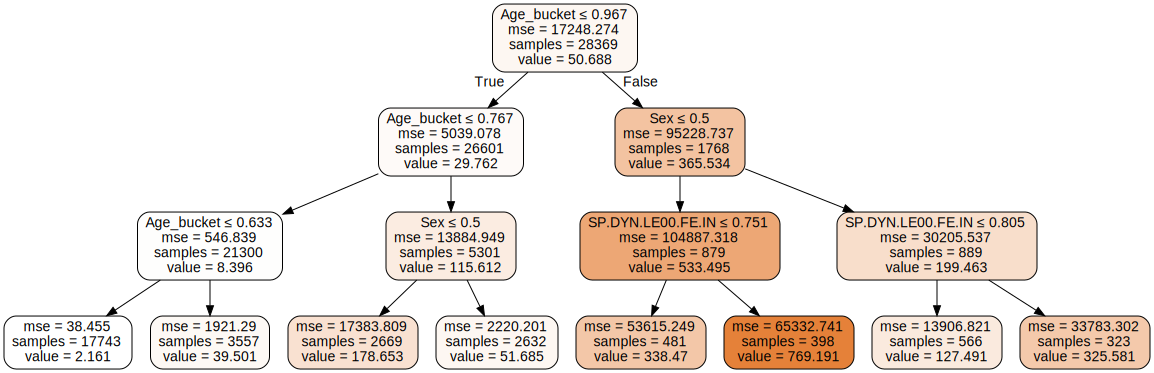

In [92]:
dot_data = tree.export_graphviz(reg_fit, out_file=None, 
                         feature_names=['Sex','Age_bucket',	'SP.DYN.CDRT.IN',	'SP.DYN.LE00.FE.IN'],  
                         class_names=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Nous remarquons qu'en utilisant les 4 variables importantes, les resultats ne sont pas meilleurs car l'erreur est plus grande

### Decision Tree Classifier

 #### Avec tous les prédicteurs

In [108]:
# Creation du model decision tree
clf_tree = DecisionTreeClassifier(max_depth=7)
# Fit du model sur le train
clf=clf_tree.fit(X_train, y_train)
# Predictions
pred = clf_tree.predict(X_test)
# Calcul du RMSE
rmse4=math.sqrt(mean_squared_error(y_test, pred))
# Calcul de la précision du train
score_train4=clf.score(X_train, y_train)
# Calcul de la précision du test
score_test4=clf.score(X_test, y_test)
print('Root mean squared error of Decision Tree classifier : {:.2f}'
     .format(rmse4))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(score_train4))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(score_test4))


Root mean squared error of Decision Tree classifier : 1.89
Accuracy of Decision Tree classifier on training set: 0.55
Accuracy of Decision Tree classifier on test set: 0.54


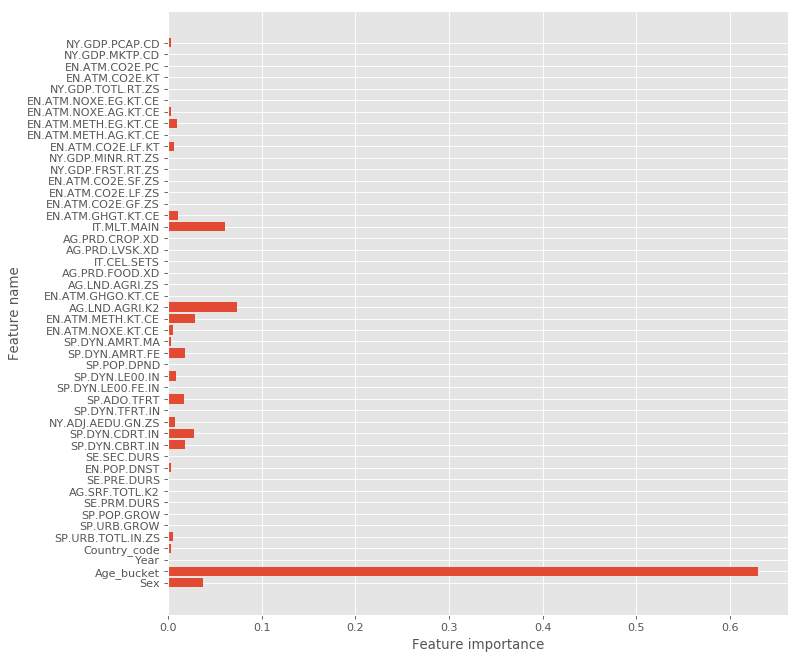

Feature importances: [  3.70634541e-02   6.30133186e-01   0.00000000e+00   3.09984320e-03
   6.01571128e-03   1.24717652e-03   1.81215933e-04   1.10795152e-03
   1.14187159e-03   1.60954788e-03   3.29344696e-03   0.00000000e+00
   1.78111668e-02   2.78306315e-02   7.57802540e-03   1.66896206e-03
   1.68431206e-02   1.46978255e-04   8.96133040e-03   1.49053407e-03
   1.79203814e-02   3.91325591e-03   5.67530154e-03   2.89797219e-02
   7.35064019e-02   0.00000000e+00   1.69660489e-03   1.04624493e-04
   1.49375727e-03   1.22491301e-03   4.54262223e-04   6.05030080e-02
   1.05756738e-02   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.57333322e-04   0.00000000e+00   6.53532768e-03   9.11498073e-04
   9.66566941e-03   3.26569662e-03   3.74734523e-04   0.00000000e+00
   6.48653427e-04   7.63134498e-04   5.59324703e-04   3.74656772e-03]


In [109]:
features_names=list(X.columns)
plt.figure(figsize=(10,10), dpi=80)
plot_feature_importances(clf, features_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

Nous remarquons 3 variables dont l'importance est grande: Age_bucket, AG.LND.AGRI.K2:Agricultural land et IT.MLT.MAIN:Fixed telephone subscriptions.

AG.LND.AGRI.K2: Agricultural land refers to the share of land area that is arable, under permanent crops, and under permanent pastures. Arable land includes land defined by the FAO as land under temporary crops (double-cropped areas are counted once), temporary meadows for mowing or for pasture, land under market or kitchen gardens, and land temporarily fallow. Land abandoned as a result of shifting cultivation is excluded. Land under permanent crops is land cultivated with crops that occupy the land for long periods and need not be replanted after each harvest, such as cocoa, coffee, and rubber. This category includes land under flowering shrubs, fruit trees, nut trees, and vines, but excludes land under trees grown for wood or timber. Permanent pasture is land used for five or more years for forage, including natural and cultivated crops

IT.MLT.MAIN: Fixed telephone subscriptions refers to the sum of active number of analogue fixed telephone lines, voice-over-IP (VoIP) subscriptions, fixed wireless local loop (WLL) subscriptions, ISDN voice-channel equivalents and fixed public payphones.

#### Avec les predicteurs les plus importants

In [94]:
Y3=df1['Mortality_cat']
X3=df1[['Age_bucket','AG.LND.AGRI.K2','IT.MLT.MAIN']]
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3,shuffle=True,random_state=10,test_size=0.30)

In [95]:
# Creation du model decision tree
clf_tree = DecisionTreeClassifier(max_depth=3)
# Fit du model sur le train
clf=clf_tree.fit(X3_train, y3_train)
pred = clf_tree.predict(X3_test)
# Predictions
print('Root mean squared error of Decision Tree classifier : {:.2f}'
     .format(math.sqrt(mean_squared_error(y3_test, pred))))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X3_train, y3_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X3_test, y3_test)))


Root mean squared error of Decision Tree classifier : 2.89
Accuracy of Decision Tree classifier on training set: 0.43
Accuracy of Decision Tree classifier on test set: 0.43


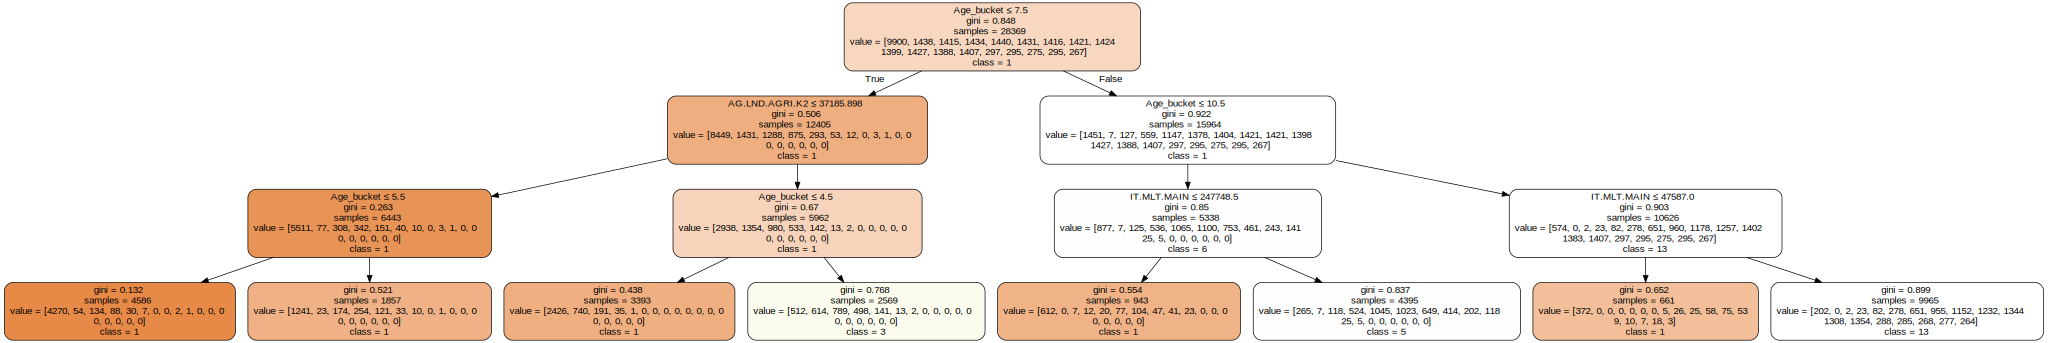

In [97]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['Age_bucket','AG.LND.AGRI.K2',' IT.MLT.MAIN'],  
                         class_names=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Nous remarquons qu'en utilisant les 4 variables importantes, le rmse est plus grand.

In [98]:
a = {'Models': ['knn regressor','decision tree regressor','knn classifier','decision tree classification'], 'score test': [score_test1,score_test2,score_test3,score_test4] , 'score train': [score_train1,score_train2,score_train3,score_train4],'RMSE': [rmse1,rmse2,rmse3,rmse4]}
df_comparaison=pd.DataFrame(data=a)
df_comparaison

,Models,RMSE,score test,score train
0,knn regressor,72.330503,0.713395,0.780050
1,decision tree regressor,35.737292,0.930034,0.975908
2,knn classifier,3.858548,0.373057,0.460749
3,decision tree classification,1.893236,0.540998,0.551200


## Conclusion:
Dans le cas d'une regression et les modeles utilisés,les variables n'expliquent pas bien les données données. En transformant la regression en classification, le RMSE demeure élevé. 
Ces deux modèles ne sont donc pas adéquats pour résoudre cette problématique.